# Topic: Sales forecasting using Time Series Modeling
# Author: Subhashini Natarajan

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima_model import ARMA, ARIMA
from sklearn.metrics import explained_variance_score

In [2]:
# Load retail sales data into a dataframe

sales = pd.read_csv("/Users/manikantanvenkataraman/Downloads/us_retail_sales.csv")
sales.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


In [3]:
# Transpose the column data into rows

sales_df= sales.melt(id_vars=["YEAR"], 
        var_name="MONTH", 
        value_name="SALES")

sales_df.head()


,YEAR,MONTH,SALES
0,1992,JAN,146925.0
1,1993,JAN,157555.0
2,1994,JAN,167518.0
3,1995,JAN,182413.0
4,1996,JAN,189135.0


In [4]:
# Convert the data type of field Year

sales_df['YEAR']=sales_df['YEAR'].astype(str)
sales_df.dtypes

YEAR      object
MONTH     object
SALES    float64
dtype: object

In [5]:
# Create the Year - Month field

sales_df['Year_Month']=sales_df.YEAR+'-'+sales_df.MONTH
sales_df.head()

,YEAR,MONTH,SALES,Year_Month
0,1992,JAN,146925.0,1992-JAN
1,1993,JAN,157555.0,1993-JAN
2,1994,JAN,167518.0,1994-JAN
3,1995,JAN,182413.0,1995-JAN
4,1996,JAN,189135.0,1996-JAN


In [6]:
# Obtain descriptive statistics 

sales_df.describe()

,SALES
count,354.000000
mean,307006.573446
std,94335.828235
min,146805.000000
25%,231402.000000
50%,309534.500000
75%,378193.750000
max,562269.000000


In [7]:
# Summarize Sales data by Year

yearly_sales=sales_df[['SALES']].groupby(sales_df['YEAR']).agg({'SALES':'sum'})
yearly_sales=yearly_sales.reset_index()
yearly_sales

,YEAR,SALES
0,1992,1804929.0
1,1993,1936304.0
2,1994,2103260.0
3,1995,2220214.0
4,1996,2355746.0
5,1997,2470772.0
6,1998,2582652.0
7,1999,2801416.0
8,2000,2979385.0
9,2001,3062153.0


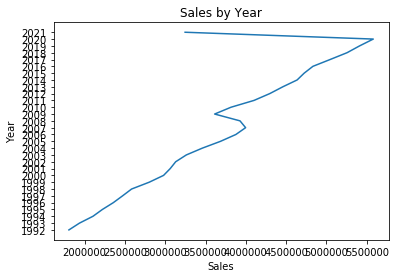

In [8]:
# Plot yearly sales data to see the trend

plt.plot(yearly_sales.SALES,yearly_sales.YEAR)
plt.xlabel('Sales')
plt.ylabel('Year')
plt.title('Sales by Year')
plt.show()

It can be observed from the graph that the sales has a steady increase until 2009. There is a drop in sales in 2009 due to recession. There is a steady increase again until 2020 and there is a drop in sales. 

In [9]:
# Filter 2020 - 2021 sales data

Sales_2020 = sales_df[(sales_df.YEAR>="2020")]

Sales_2020['Year_Month'] = pd.to_datetime(Sales_2020['Year_Month']) # Convert Year_Month into date

Sales_2020.sort_values(by=['Year_Month'], inplace=True) # Sort by Year- Month

Sales_2020.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,YEAR,MONTH,SALES,Year_Month
28,2020,JAN,460586.0,2020-01-01
58,2020,FEB,459610.0,2020-02-01
88,2020,MAR,434281.0,2020-03-01
118,2020,APR,379892.0,2020-04-01
148,2020,MAY,444631.0,2020-05-01


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


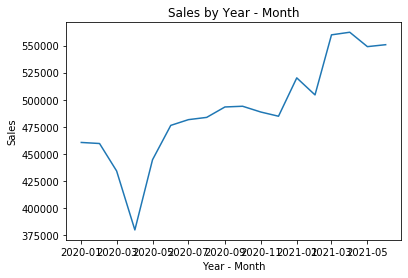

In [10]:
# Plot the monthly sales data

from  matplotlib import pyplot as plt
plt.plot(Sales_2020.Year_Month,Sales_2020.SALES)
plt.xlabel('Year - Month')
plt.ylabel('Sales')
plt.title('Sales by Year - Month')
plt.show()

In [183]:
# Convert the Year - Month into date
sales_df['Year_Month'] = pd.to_datetime(sales_df['Year_Month'])
sales_df.head()

,YEAR,MONTH,SALES,Year_Month
0,1992,JAN,146925.0,1992-01-01
1,1993,JAN,157555.0,1993-01-01
2,1994,JAN,167518.0,1994-01-01
3,1995,JAN,182413.0,1995-01-01
4,1996,JAN,189135.0,1996-01-01


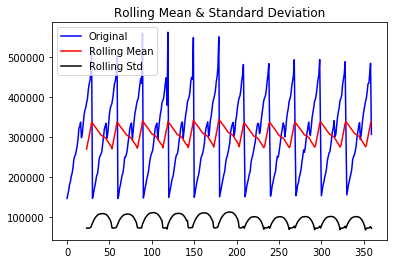

Results of Dickey-Fuller Test:
Test Statistic                -9.454956e+00
p-value                        4.511030e-16
#Lags Used                     1.700000e+01
Number of Observations Used    3.420000e+02
Critical Value (1%)           -3.449616e+00
Critical Value (5%)           -2.870028e+00
Critical Value (10%)          -2.571292e+00
dtype: float64


In [11]:
# Verify if the data is stationary to perform time-series

sales_df['SALES'].fillna(int(sales_df['SALES'].mean()), inplace=True)
y=sales_df.SALES
t=24

#Determing rolling statistics

rolmean = y.rolling(window=t).mean()
rolstd = y.rolling(window=t).std()
#Plot rolling statistics:
orig = plt.plot(y, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)


#Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(y, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
'p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller test shows that test statistic is lesser than the critical value and hence the data is stationary. However, in order to smooth the rolling mean and standard deviation, will perform de-trending.

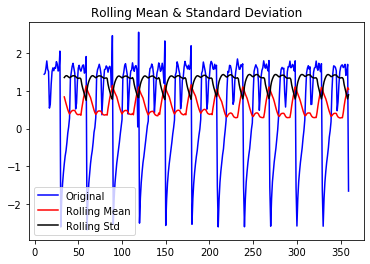

Results of Dickey-Fuller Test:
Test Statistic                -9.454956e+00
p-value                        4.511030e-16
#Lags Used                     1.700000e+01
Number of Observations Used    3.420000e+02
Critical Value (1%)           -3.449616e+00
Critical Value (5%)           -2.870028e+00
Critical Value (10%)          -2.571292e+00
dtype: float64


In [83]:
#De-trend the data

y_detrend =  (y - y.rolling(window=12).mean())/y.rolling(window=12).std()

t=24
#Determing rolling statistics
rolmean = y_detrend.rolling(window=t).mean()
rolstd = y_detrend.rolling(window=t).std()

#Plot rolling statistics:
orig = plt.plot(y_detrend, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(y, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
'p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

In [105]:
# Split the data into Train and test
# Until 2020-06-01 will be training data
# The last year from 2021-07-01 to 2021-06-01 will the test data

sales_train =sales_df[(sales_df.Year_Month<="2020-06-01")]
sales_test = sales_df[(sales_df.Year_Month>"2020-06-01")]

In [109]:
# Determine the best values for p-d-q

import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_period = 52 # Assigning a seasonal period of 52
seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
mini = float('+inf')
    
    
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(sales_train.SALES,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

            results = mod.fit()
                
            if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal
                    
        except:
                continue

print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsup

The set of parameters with the minimum AIC is: SARIMA(0, 1, 0)x(1, 1, 1, 52) - AIC:5867.722795947095


Best p-d-q values are found to be 1-1-1

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L52      -0.1524      0.093     -1.633      0.102      -0.335       0.031
ma.S.L52      -0.7349      0.079     -9.300      0.000      -0.890      -0.580
sigma2      4.999e+09   3.25e-11   1.54e+20      0.000       5e+09       5e+09


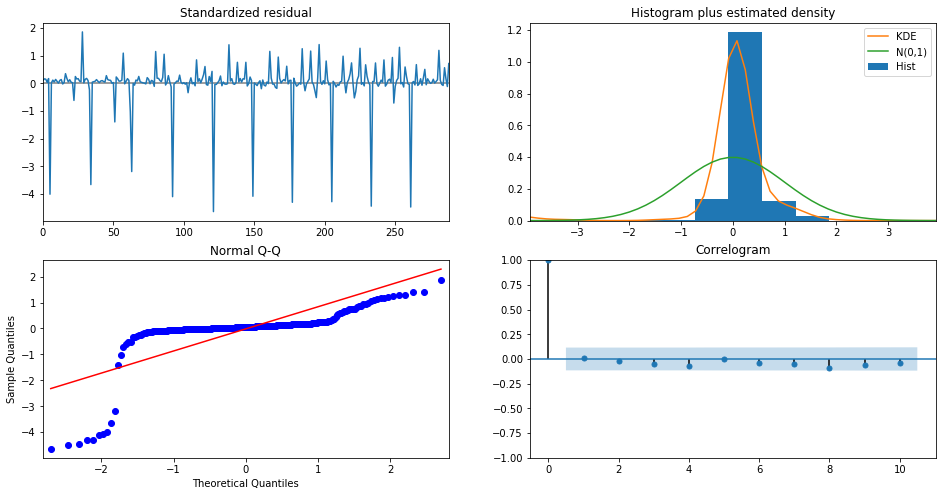

In [135]:
# Build the model with the training dataset

import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(sales_train.SALES,order=(0, 1, 0),seasonal_order=(1,1,1,52))
results=model.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(16, 8))
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


The Root Mean Squared Error of SARIMA with season_length=52 and dynamic = False 50238.43


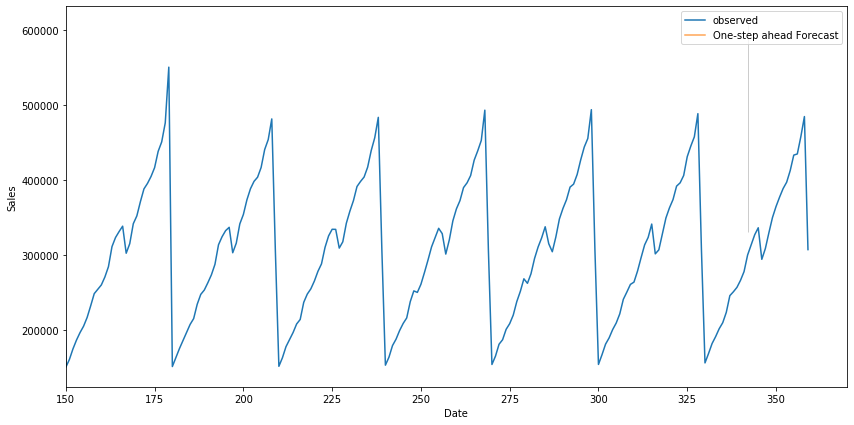

In [165]:
# Predict results using the test data 

sales_test.reset_index(drop=True) 
y_to_test=sales_test['SALES']

y_to_test.reset_index(inplace=True,drop=True) 

pred = results.get_prediction(start=342, dynamic=False)
pred_ci = pred.conf_int()
y_forecasted = pred.predicted_mean
y_forecasted.reset_index(inplace=True,drop=True) 
mse = ((y_forecasted - y_to_test) ** 2).mean()
print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(np.sqrt(mse), 2)))

ax = y.plot(label='observed')
y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_xlim(150, 370)
plt.legend()
plt.show()


The RMSE value with the test dataset is observed to be 50,238.43